In [1]:
# 필요한 패키지 설치
!pip install missingno
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
df = pd.read_csv("datasets/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [3]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


In [5]:
# 결측값 수만 확인
df.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

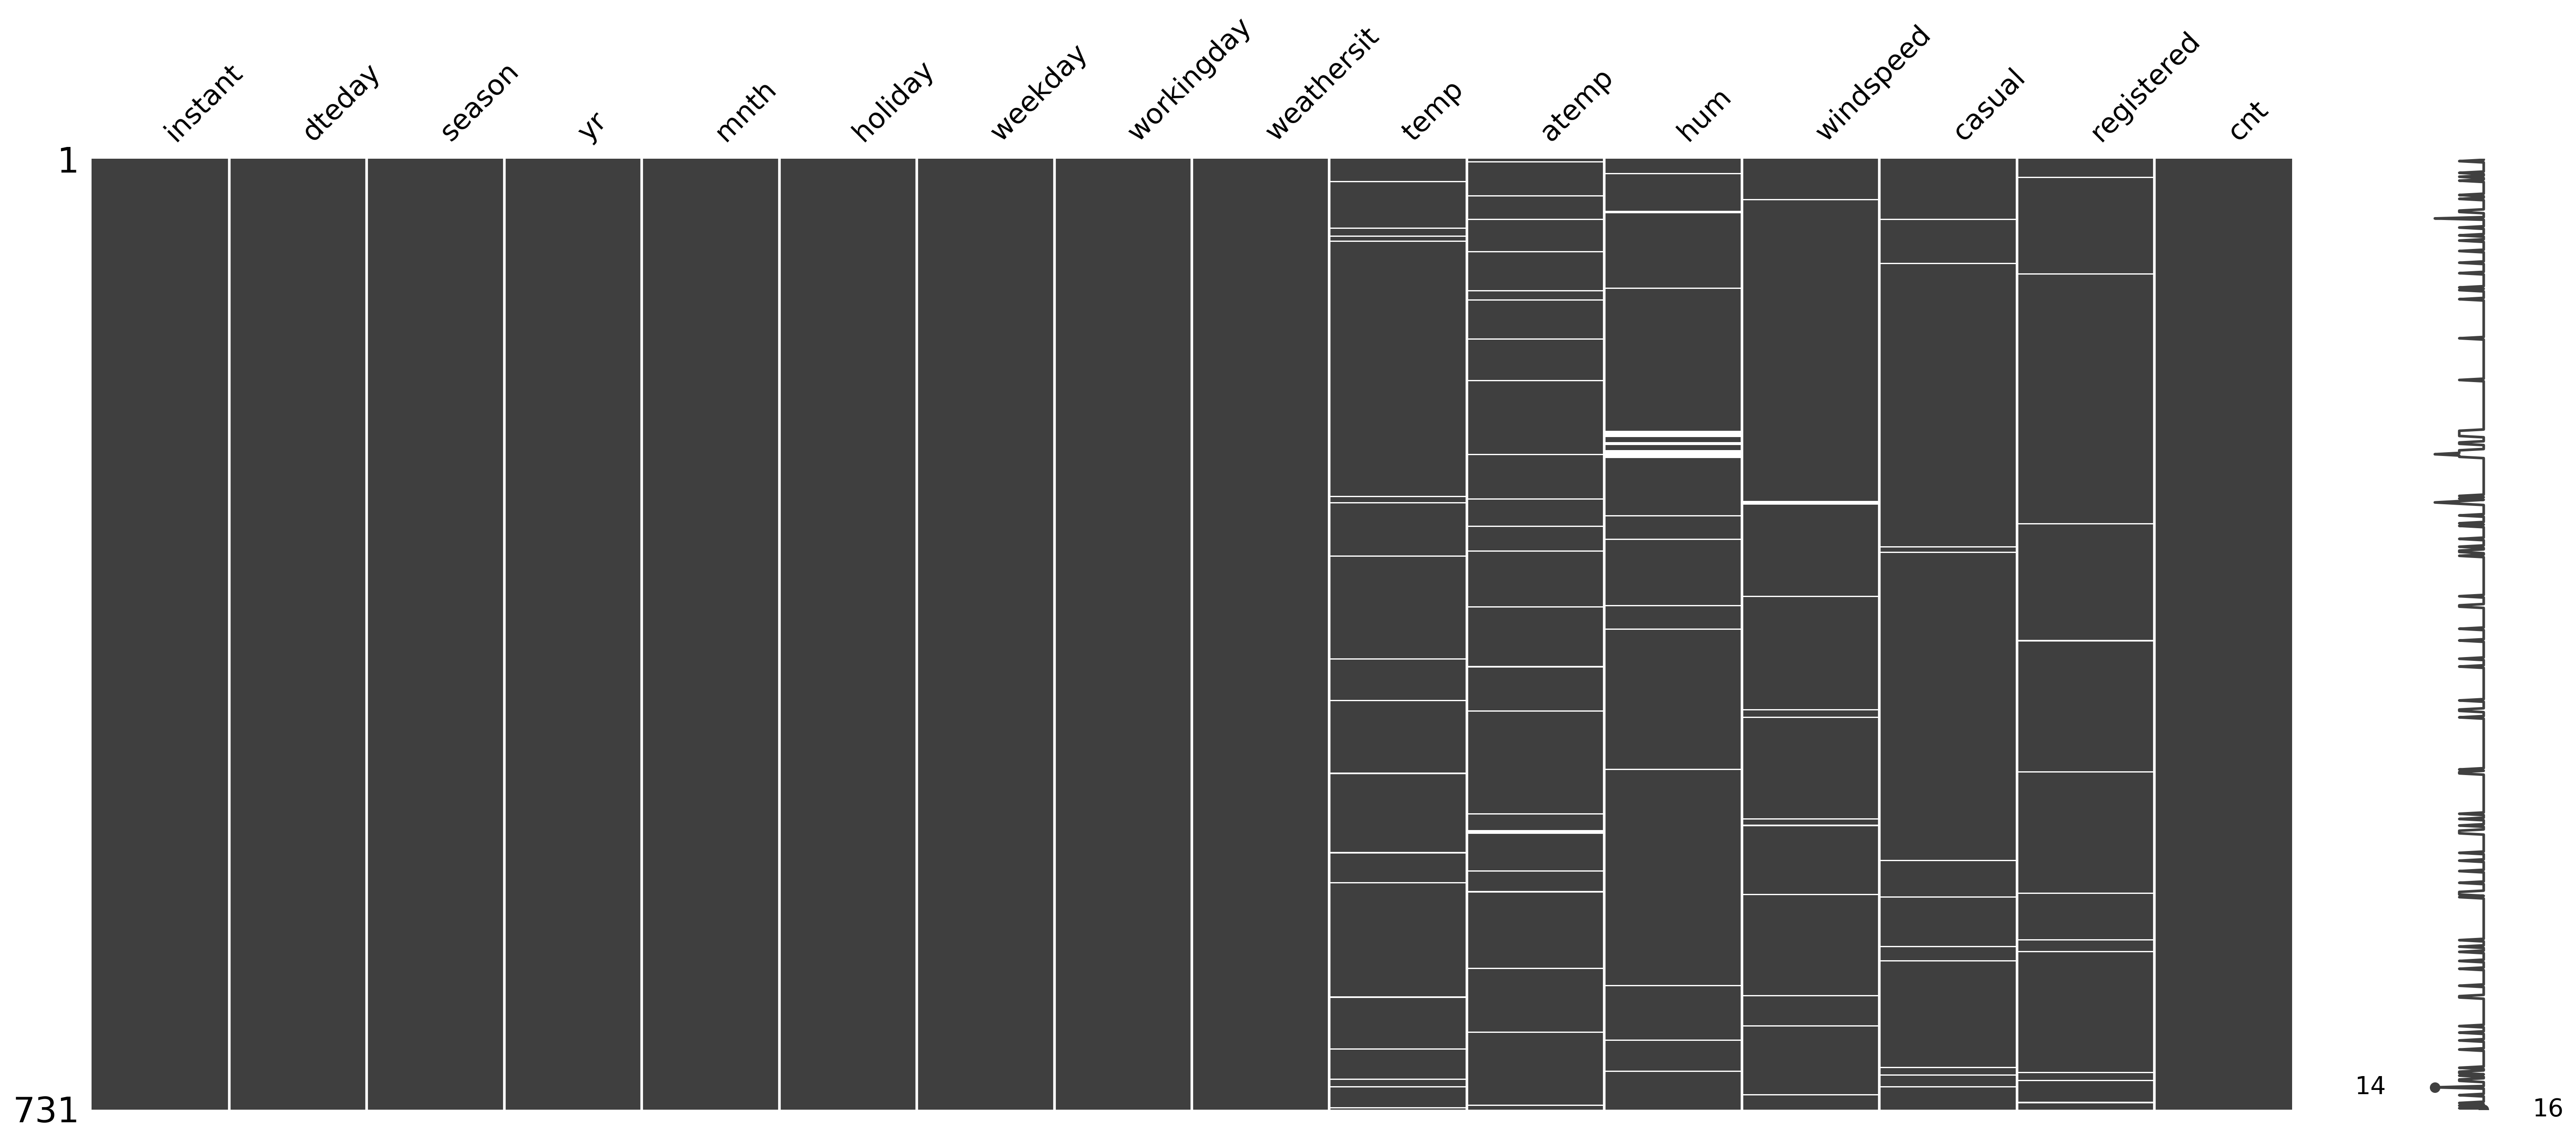

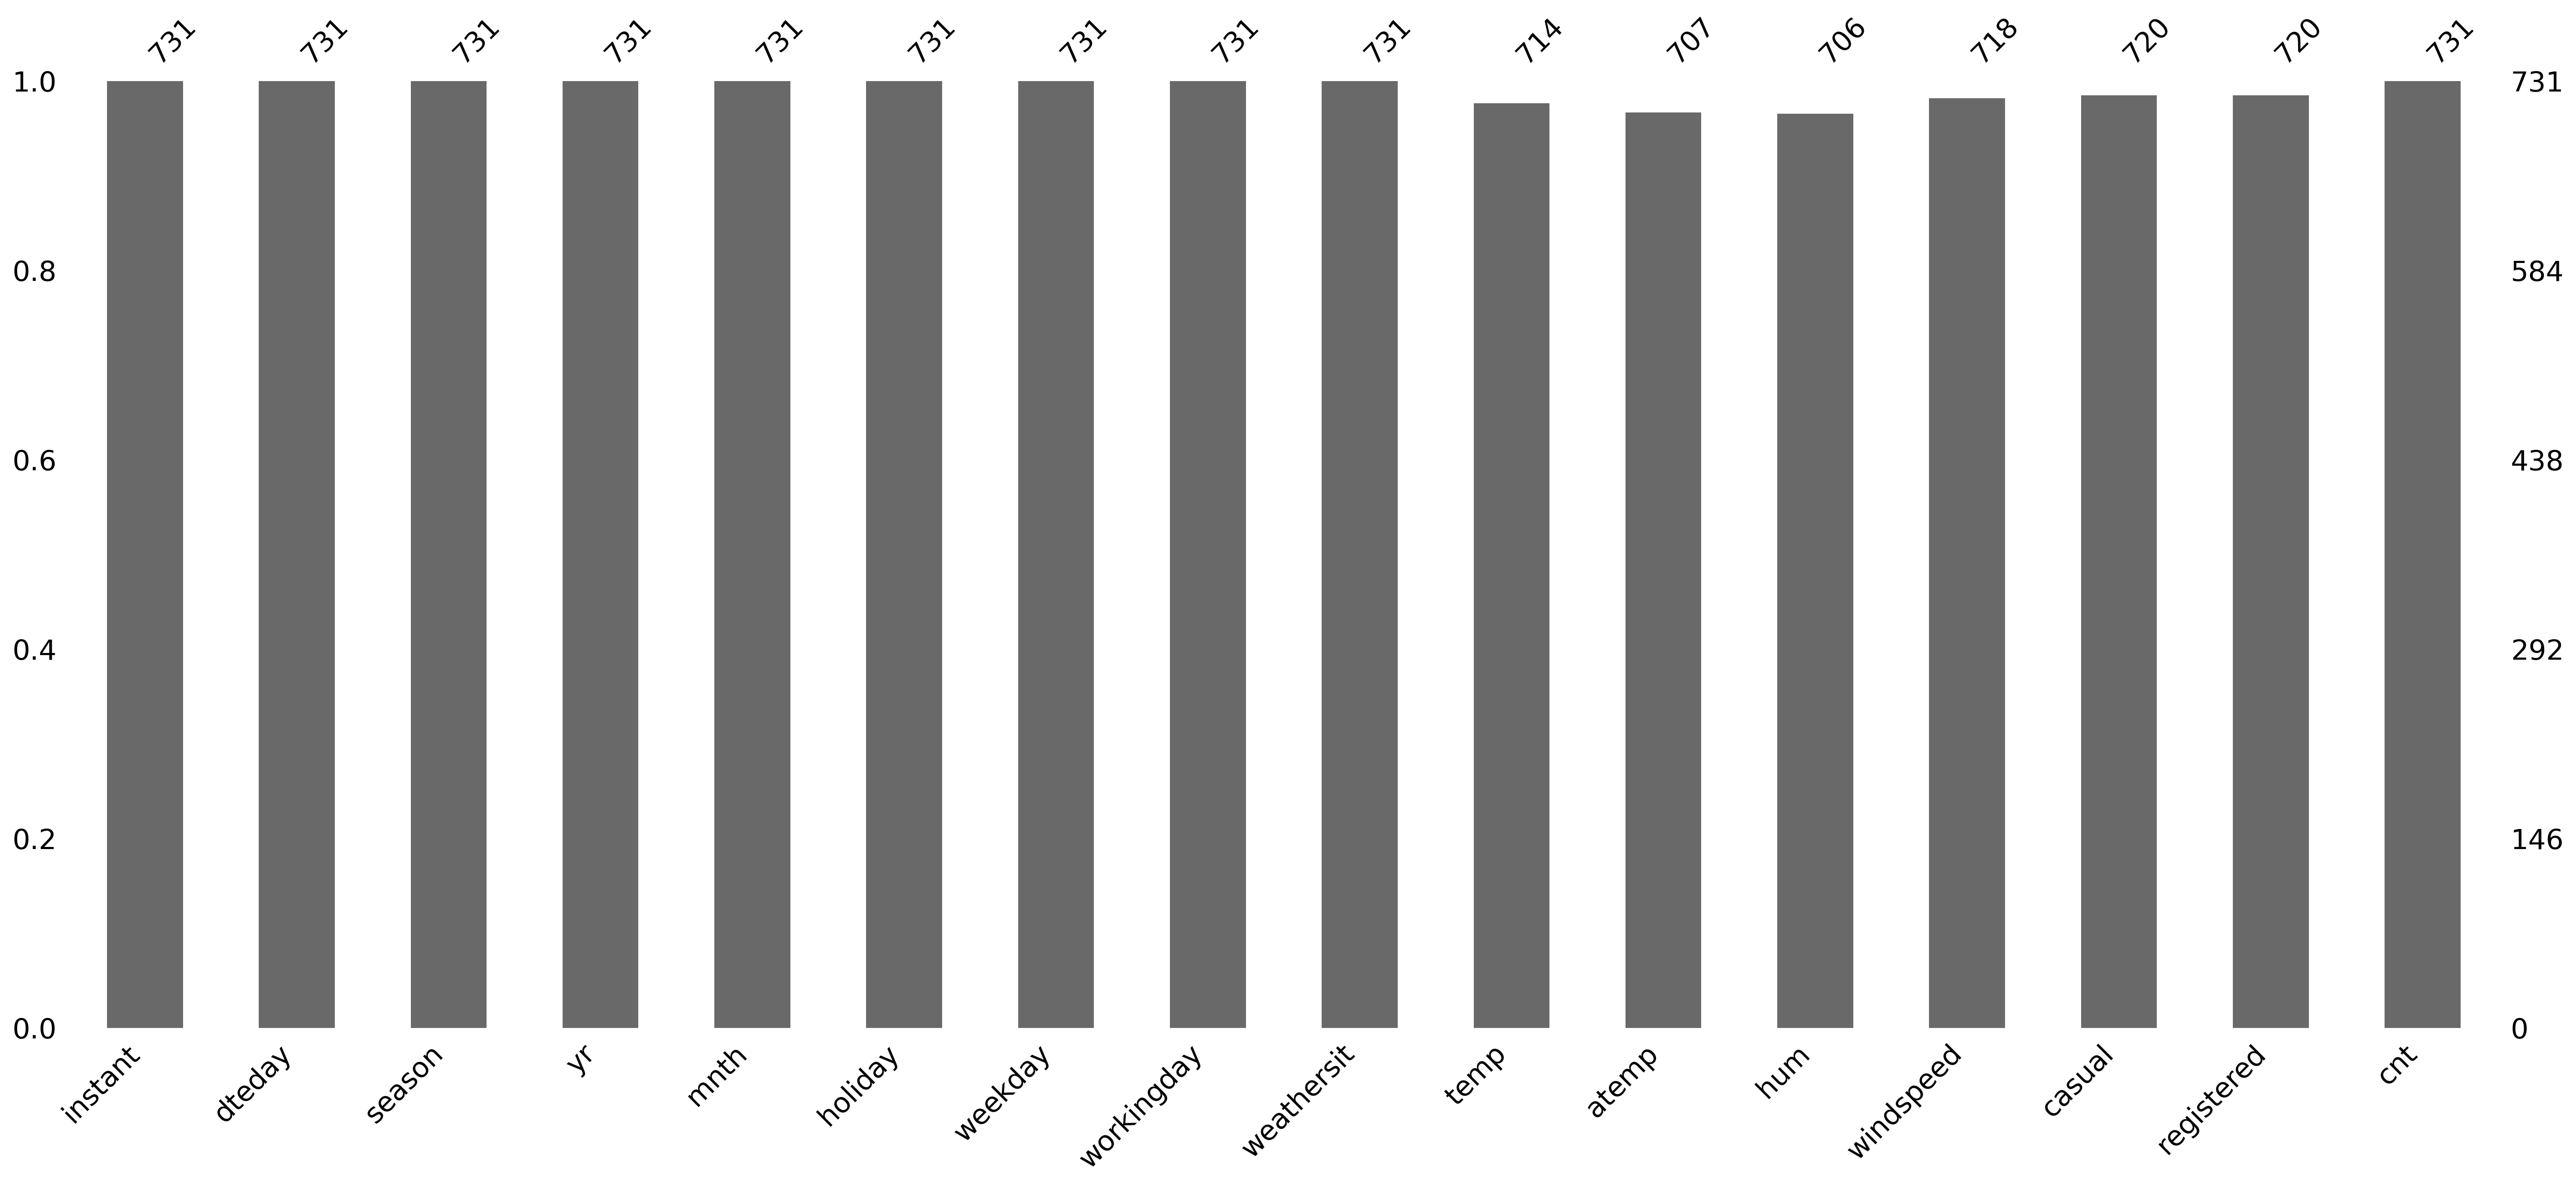

In [6]:
# 결측값 시각화 - 전체 컬럼의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show()

# 결측값 막대 그래프
msno.bar(df)
plt.show()

In [22]:
# 결측값이 아닌 빈 문자열이 있는지 확인

def is_emptystring(x):
    return x.eq('').any()
 
df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [11]:
# 결측값 표본 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp'])

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

df_drop_any.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
## 결측값 기본 대치 방법들

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0})

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df.mean())

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()})

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df.median())

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()})

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode())

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()})

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max())

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()})

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'],'hum':df['hum'].min()})


df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [15]:
# 결측값 보간 대치 방법들

# 전 시점 값으로 대치 - 컬럼 지정
df1 = df.copy()
df1['temp'].fillna(method ='pad' ,inplace=True)

# 뒤 시점 값으로 대치 - 전체 컬럼
df.fillna(method ='bfill')

# 뒤 시점 값으로 대치 - 결측값 연속 한번만 대치
df.fillna(method='bfill', limit=1)

# 보간법 함수 사용하여 대치 - 단순 순서 방식
ts_intp_linear = df.interpolate(method='values')

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 컬럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday'])

    # dteday 컬럼 인덱스 변경
df_i = df.set_index('dteday') 

    # 시점에 따른 보간법 적용
df_time = df_i.interpolate(method='time')

df_time.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
#다중 대치(MICE) 

# dteday 컬럼 제거
df_dp = df.drop(['dteday'],axis=1)

# 다중 대치 알고리즘 설정
imputer=IterativeImputer(imputation_order='ascending',
                         max_iter=10,random_state=42,
                         n_nearest_features=5)

# 다중 대치 적용
df_imputed = imputer.fit_transform(df_dp)

# 판다스 변환 및 컬럼 설정
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = ['instant','season','yr','mnth','holiday'
                    ,'weekday','workingday','weathersit','temp'
                    ,'atemp','hum','windspeed','casual','registered','cnt']

df_imputed.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64